In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random as rn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical



out_path = '/content/drive/My Drive/Ritorti[_Pasco]/project/numpy_data'

BATCH_SIZE = 64






# **Dataset load**

In [ ]:
def load_training():
  images = np.load(os.path.join(out_path,'train_tensor.npy'))
  labels = np.load(os.path.join(out_path,'train_labels.npy'))
  return images,labels

def load_testing():
  images = np.load(os.path.join(out_path,'public_test_tensor.npy'))
  labels = np.load(os.path.join(out_path,'public_test_labels.npy'))
  return images,labels


 
images_train, labels_train= load_training()
images_test, labels_test= load_testing()












# **Preprocessing**


##Preparing training and test set for mass-calcification classification and normalization

In [ ]:
#BENIGN - MALIGNANT
train_zipped = zip(images_train,labels_train)
test_zipped = zip(images_test,labels_test)
train_images_ben_mal,train_labels_ben_mal = [],[]
test_images_ben_mal,test_labels_ben_mal = [],[]

#training
for im,la in train_zipped:
  if la == 1 or la == 3: #benign -> 0
    train_images_ben_mal.append(im)
    train_labels_ben_mal.append(0)
  elif la == 2 or la == 4: #malignant -> 1
    train_images_ben_mal.append(im)
    train_labels_ben_mal.append(1)

#testing
for im,la in test_zipped:
  if la == 1 or la == 3: #benign -> 0
    test_images_ben_mal.append(im)
    test_labels_ben_mal.append(0)
  elif la == 2 or la == 4: #malignant -> 1
    test_images_ben_mal.append(im)
    test_labels_ben_mal.append(1)

train_images_ben_mal = np.array(train_images_ben_mal)
train_labels_ben_mal = np.array(train_labels_ben_mal)
test_images_ben_mal = np.array(test_images_ben_mal)
test_labels_ben_mal = np.array(test_labels_ben_mal)
print(f"Shape training: {train_images_ben_mal.shape}")
print(f"Shape testing: {test_images_ben_mal.shape}")
print(f"Shape label training: {train_labels_ben_mal.shape}")
print(f"Shape label testing: {test_labels_ben_mal.shape}")

#Normalization

train_images_ben_mal = train_images_ben_mal.reshape((2676, 150,150,1))
test_images_ben_mal = test_images_ben_mal.reshape((336, 150,150,1))

train_images_ben_mal  = train_images_ben_mal .astype('float32') / 65535
test_images_ben_mal= test_images_ben_mal.astype('float32') / 65535



Shape training: (2676, 150, 150)
Shape testing: (336, 150, 150)
Shape label training: (2676,)
Shape label testing: (336,)


In [ ]:
# Setting of parameters for reproducible results
os.environ["PYTHONHASHSEED"]="0"
np.random.seed(31)
rn.seed(14)
tf.random.set_seed(1234)

## Some of our dataset view

Distribution of classes

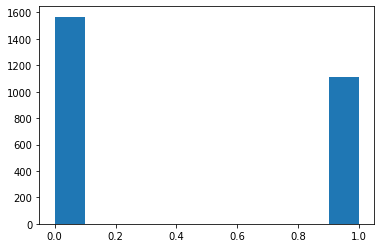

In [ ]:
plt.hist(train_labels_ben_mal)
plt.show()

float32


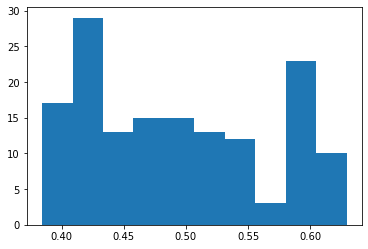

In [ ]:
print(train_images_ben_mal[0].dtype) 
plt.hist(train_images_ben_mal[0][0]) 
plt.show()

# **Scratch network**

In [ ]:
#SMALL CONVNET WITH CONV2D AND MAXPOOLING2D
from tensorflow.keras import layers
from tensorflow.keras import models



model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()





Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
from tensorflow.keras import optimizers


model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images_ben_mal, train_labels_ben_mal,validation_split=0.2, epochs=30, batch_size=64, shuffle = True)

Epoch 1/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7178 - accuracy: 0.5566 - val_loss: 0.6734 - val_accuracy: 0.6250
Epoch 2/30
34/34 [==============================] - 2s 50ms/step - loss: 0.6788 - accuracy: 0.5793 - val_loss: 0.6563 - val_accuracy: 0.6250
Epoch 3/30
34/34 [==============================] - 2s 48ms/step - loss: 0.6602 - accuracy: 0.6114 - val_loss: 0.6475 - val_accuracy: 0.6306
Epoch 4/30
34/34 [==============================] - 2s 48ms/step - loss: 0.6565 - accuracy: 0.6092 - val_loss: 0.6586 - val_accuracy: 0.6157
Epoch 5/30
34/34 [==============================] - 2s 47ms/step - loss: 0.6685 - accuracy: 0.5994 - val_loss: 0.6654 - val_accuracy: 0.6250
Epoch 6/30
34/34 [==============================] - 2s 47ms/step - loss: 0.6426 - accuracy: 0.6378 - val_loss: 0.6538 - val_accuracy: 0.6269
Epoch 7/30
34/34 [==============================] - 2s 47ms/step - loss: 0.6746 - accuracy: 0.5815 - val_loss: 0.6529 - val_accuracy: 0.6381
Epoch 8/30
34

Save the model

In [ ]:
#dir_name ="/content/drive/My Drive/Ritorti[_Pasco]/models"
#if not os.path.exists(dir_name):
#  os.makedirs(dir_name)
#model.save(os.path.join(dir_name,'benign_and_malign.h5'))

# **Training and validation accuracy-loss diagrams**

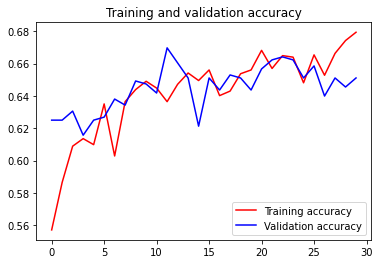

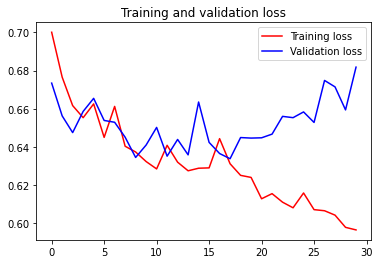

In [ ]:
#PLOT THE LOSS AND ACCURACY
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Evaluating the model with the test set**

In [ ]:
test_loss, test_acc = model.evaluate(test_images_ben_mal, test_labels_ben_mal)
print('test_acc:', test_acc)

11/11 [==============================] - 0s 10ms/step - loss: 0.6346 - accuracy: 0.6458
test_acc: 0.6458333134651184


In [ ]:
predictions = model.predict(test_images_ben_mal) # get the output for each sample

predictions = np.round(predictions)
predictions = predictions.astype(int)

unique, counts = np.unique(test_labels_ben_mal, return_counts=True)
print('true',dict(zip(unique, counts)))
unique, counts = np.unique(predictions, return_counts=True)
print('pred',dict(zip(unique, counts)))

true {0: 219, 1: 117}
pred {0: 218, 1: 118}


**We save the predictions in a txt file to use them in the ensable method**

In [ ]:
#import csv
#dir_data_store ="/content/drive/My Drive/Ritorti[_Pasco]/data_store"
#if not os.path.exists(dir_data_store):
#  os.makedirs(dir_data_store)

#np.savetxt(os.path.join(dir_data_store,"predictions_22.csv"), predictions, delimiter=",")

**Evaluation of the model with the following tools:**


1.   Confusion matrix
2.   Accuracy, precision, recall and f1-score
3.   ROC curve

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(test_labels_ben_mal,predictions)

array([[159,  60],
       [ 59,  58]])

In [ ]:
# accuracy: (TP+TN)/(TP+FP+FN+TN): percentage of correctly predicted samples
metrics.accuracy_score(test_labels_ben_mal,predictions)

0.6458333333333334

In [ ]:
# precision: TP/(TP+FP): The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
metrics.precision_score(test_labels_ben_mal,predictions)

0.4915254237288136

In [ ]:
# recall: TP/(TP+FN): The recall is intuitively the ability of the classifier to find all the positive samples.
metrics.recall_score(test_labels_ben_mal,predictions)

0.49572649572649574

In [ ]:
# f1-score: 2*(precision*recall)/(precision + recall). The F1-score is the harmonic mean of precision and sensitivity
metrics.f1_score(test_labels_ben_mal,predictions)

0.49361702127659574

In [ ]:
# classification report: Build a text report showing the main classification metrics
print(metrics.classification_report(test_labels_ben_mal,predictions))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       219
           1       0.49      0.50      0.49       117

    accuracy                           0.65       336
   macro avg       0.61      0.61      0.61       336
weighted avg       0.65      0.65      0.65       336



In [ ]:
fpr,tpr,th = metrics.roc_curve(test_labels_ben_mal,predictions)
roc_auc = metrics.roc_auc_score(test_labels_ben_mal,predictions)

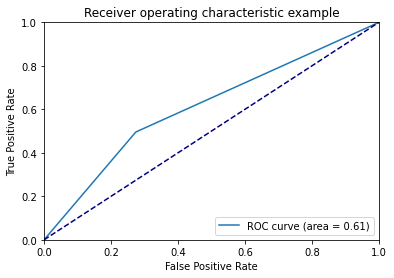

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#plt.savefig(os.path.join(dir_img,"ROC_curve.png"))
plt.show()